# Downloading Data from Kaggle

In [ ]:
# !pip install tensorflow tensorflow-gpu opencv-python mathplotlib

In [ ]:
# !pip list

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# To test if connecting kaggle was done correctly
!kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset        Customer Shopping (Latest Trends) Dataset    76KB  2024-11-23 15:26:12           7900        146  1.0              
malaiarasugraj/global-health-statistics                    Global Health Statistics                     44MB  2024-11-27 10:52:27           2098         28  1.0              
mujtabamatin/air-quality-and-pollution-assessment          Air Quality and Pollution Assessment         84KB  2024-12-04 15:29:51           2380         45  1.0              
hopesb/student-depression-dataset                          Student Depression Dataset.                 454KB  2024-11-22 17:5

In [ ]:
!kaggle datasets download -d kmldas/insect-identification-from-habitus-images

Dataset URL: https://www.kaggle.com/datasets/kmldas/insect-identification-from-habitus-images
License(s): other
 99% 2.36G/2.38G [00:27<00:00, 97.7MB/s]
100% 2.38G/2.38G [00:27<00:00, 93.6MB/s]


In [ ]:
!unzip insect-identification-from-habitus-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: database/8335452/d075s0317.jpg  
  inflating: database/8335452/d075s0318.jpg  
  inflating: database/8335452/d075s0319.jpg  
  inflating: database/8335452/d075s0320.jpg  
  inflating: database/8335452/d075s0321.jpg  
  inflating: database/8335452/d075s0322.jpg  
  inflating: database/8335452/d075s0323.jpg  
  inflating: database/8335452/d075s0324.jpg  
  inflating: database/8335452/d075s0338.jpg  
  inflating: database/8335452/d075s0339.jpg  
  inflating: database/8335452/d075s0340.jpg  
  inflating: database/8335452/d075s0341.jpg  
  inflating: database/8335452/d075s0342.jpg  
  inflating: database/8335452/d075s0343.jpg  
  inflating: database/8335452/d075s0344.jpg  
  inflating: database/8335452/d075s0345.jpg  
  inflating: database/8335452/d075s0346.jpg  
  inflating: database/8335452/d075s0347.jpg  
  inflating: database/8335452/d075s0348.jpg  
  inflating: database/8335452/d075s0349.jpg  
  inflating: database/8335452

In [ ]:
!rm insect-identification-from-habitus-images.zip

In [ ]:
import pandas as pd
import os
insects = {}
for folder in [gbif for gbif in os.listdir("./database")]:
  DIR = './database/' + folder
  insects[folder] = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

sorted_insects = {k: v for k, v in sorted(insects.items(), key=lambda item: item[1], reverse=True)}
top_5 = {}
for key in list(sorted_insects)[:2]:
  top_5[key] = sorted_insects[key]

top_5

{'9364935': 888, '1035931': 861}

In [ ]:
!mkdir ./data

In [ ]:
import shutil

for k, v in top_5.items():
  source_dir = 'database/' + k
  target_dir = 'data/'
  os.mkdir(os.path.join('data', k))
  target_dir = 'data/' + k

  file_names = os.listdir(source_dir)

  for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
import tensorflow as tf

### Avoiding OOM errors by setting GPU memory consumption growth

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU') # graps all GPUs in our machine
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [ ]:
data_dir = 'data'

In [ ]:
os.listdir(data_dir)

['1035931', '9364935']

### Keep only well-known image formats

In [ ]:
image_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  if image_class.startswith('beetle_'):
    print(image_class)

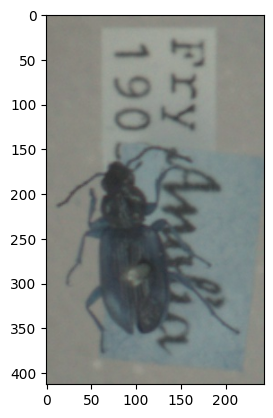

In [ ]:
sample_img = cv2.imread(os.path.join(data_dir, '1035931', 'd080s0001.jpg'))
plt.imshow(sample_img)

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_ext:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [ ]:
tf.data.Dataset?? # double question mark outputs help/documentation

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data') # generator

Found 1749 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator() # allowing to loop the generator

In [ ]:
batch = data_iterator.next() # grabbing data (image, label)

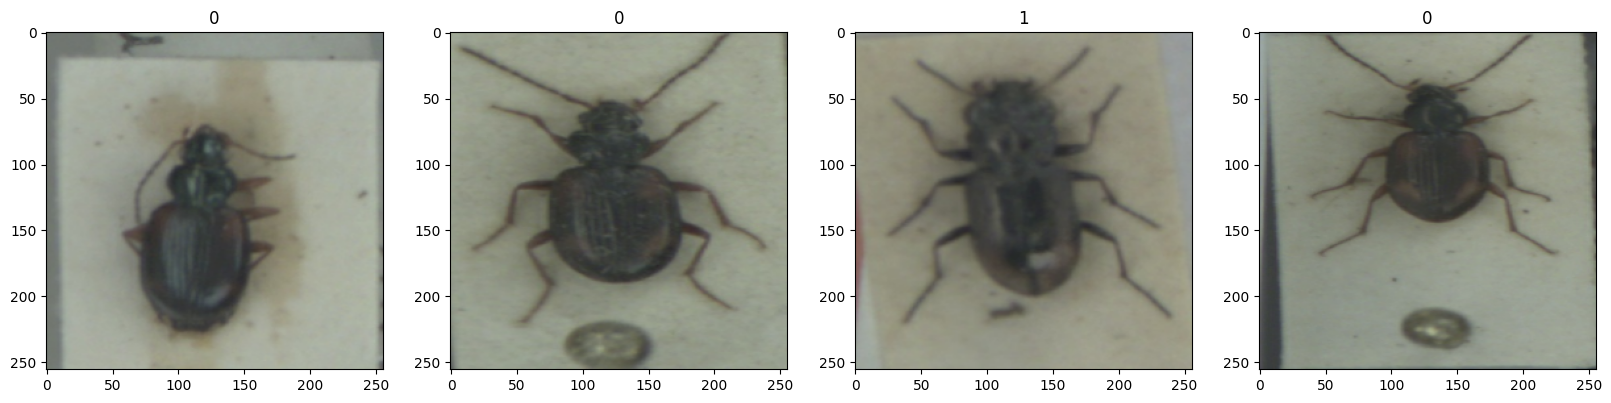

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Data Preprocessing (scaling and splitting)

### Data Scaling

In [ ]:
data = data.map(lambda x, y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
print(batch[0].min(), batch[0].max())

0.12753762 1.0


In [ ]:
print(batch[0].shape)

(32, 256, 256, 3)


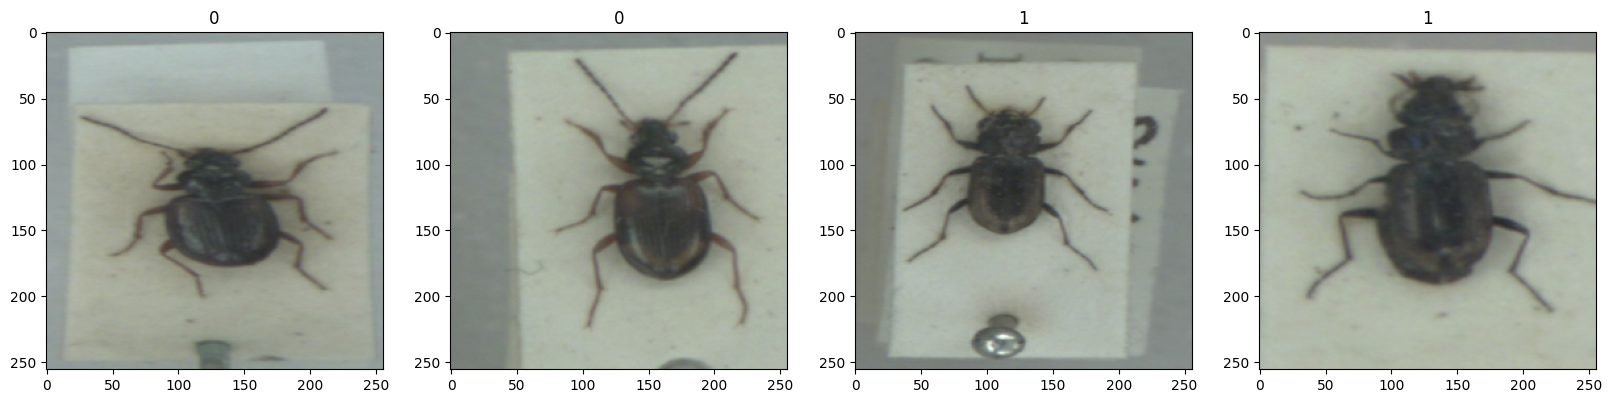

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

### Data Splitting

In [ ]:
len(data) # no. of batches

55

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
print(train_size, val_size, test_size)

38 11 5


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
print(len(train), len(val), len(test))

38 11 5


# Deep Learning Model

### Build a Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train

In [ ]:
!mkdir logs

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.5212 - loss: 1.0193 - val_accuracy: 0.7131 - val_loss: 0.6784
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6449 - loss: 0.6710 - val_accuracy: 0.6364 - val_loss: 0.6355
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6764 - loss: 0.6353 - val_accuracy: 0.5284 - val_loss: 0.8829
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.7061 - loss: 0.6086 - val_accuracy: 0.7585 - val_loss: 0.5330
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.7415 - loss: 0.5020 - val_accuracy: 0.7784 - val_loss: 0.4896
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.8070 - loss: 0.4371 - val_accuracy: 0.8438 - val_loss: 0.4187
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.8271 - loss: 0.4028 - val_accuracy: 0.8381 - val_loss: 0.3971
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8634 - loss: 0.3881 - val_accuracy: 0.84

### Plot Performance

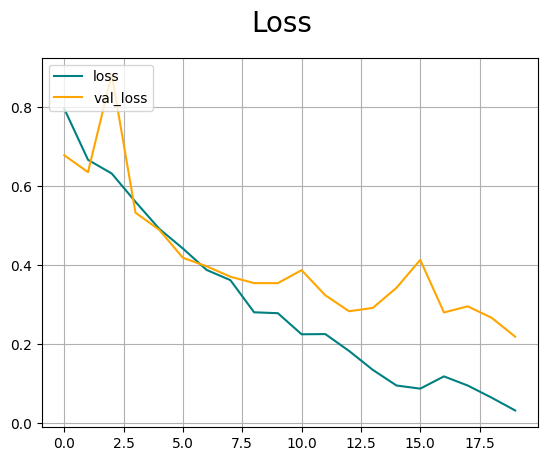

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.grid()
plt.legend(loc="upper left")
plt.show()

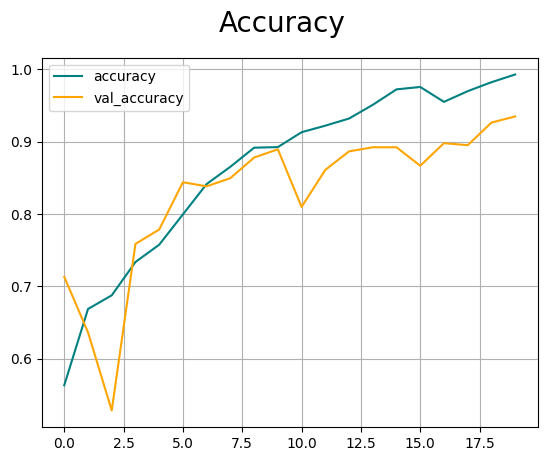

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.grid()
plt.legend(loc="upper left")
plt.show()

# Evaluate Performace

### Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8799999952316284, Recall: 0.8684210777282715, Accuracy: 0.8812500238418579


### Test

In [ ]:
# to test the model on imges that it have never seen
img = cv2.imread('path_to_images') # cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if prediction > 0.5:
  print(f'Insect Type I')
else:
  print(f'Insect Tpye II')

# Save the Model

### Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'insect_classifier.keras'))

In [ ]:
new_model = load_model(os.path.join('models', 'insect_classifier.keras'))

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
new_model

<Sequential name=sequential_1, built=True>

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))